## Activitat 1: Oxigen (Z = 8)

En aquesta activitat, determinareu els valors dels termes de volum i asimetria en el Model de Gota Líquida basant-vos en les dades experimentals dels isòtops d’oxigen.

A sota les gràfiques es mostren els paràmetres de la fórmula del ***Model de Gota Líquida (MGL)***. Podeu tornar a visitar el vídeo del Dr. Arnau Rios (https://youtu.be/Qsu7IrGiOIk) sobre aquest tema per obtenir més informació sobre cada paràmetre.

Junt aquests parametres es mostra la taula que conté l'energia d'enllaç per nucleó mesurada experimentalment i calculada teòricament (l'energia d'enllaç dividida per $A$, el nombre total de neutrons i protons) per a tots els isòtops d'oxigen observats (nombre de protons Z=8). Els valors calculats teòricament utilitzen els valors dels paràmetres adyacents que pots manipular.

Totes les energies es donen en unitats de kilo-electrons-volts $(keV)$.

A la ***Gràfica 1*** es mostra l'energia d'enllaç per nucleó mesurada experimentalment i la calculada teòricament per a tots els isòtops d'oxigen observats (dades de l'arxiu *mass1_mas20.txt*, extret de https://www-nds.iaea.org/amdc/). La ***Gràfica 2*** mostra la diferència entre aquestes energies d’enllaç experimental i teòrica (última columna de la taula inferior), utilitzant els paràmetres del MGL.

El vostre objectiu és canviar els paràmetres del ***MGL*** de manera que les diferències en valors experimentals i teòrics siguin el més a prop possible de zero. D'això se'n diu optimitzar els paràmetres. Seguiu llegint per esbrinar com.

Aquesta activitat es pot adaptar per a altres elements de la Taula Periòdica, per fer-ho només s'ha d'entrar el simbol de l'element que es vulgui estudiar a la capsa anomenada ***Element***. T'animes a canviar l'element i fer-te noves preguntes més enllà d'aquesta activitat?

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

%matplotlib nbagg

In [2]:
def extract(x):
    global extract_n
    extract_n = df.loc[df['Element'] == x]
    return

def update_plot(element, av, aS, ac, aA, ap, checkbox):
    global y, df
    '''
    this function is linked to the slider and
    it replots the binding energy by nucleon when the slider are changed
    '''
    df = pd.read_fwf('https://raw.githubusercontent.com/dpascuso/divulgacio_nuclear/main/mass_1.mas20.txt',    
                 usecols=(2, 3, 4, 6, 11),
                 names=['N', 'Z', 'A', 'Element', 'Experimental'],
                 widths=(1,3,5,5,5,1,3,4,1,14,12,13,1,10,1,2,13,11,1,3,1,13,12,1),
                 header=28, 
                 index_col=False)

    df['Experimental'] = pd.to_numeric(df.Experimental.str.replace('#',''))
    extract(element)
    
    axes[0].clear()
    axes[1].clear()
    Z = extract_n.Z
    A = extract_n.A
    y = (av*A-aS*pow(A,2/3)-ac*pow(Z,2)*pow(A,-1/3)-aA*pow((A-2*Z),2)/A +((A % 2)==0) * ap/np.sqrt(A))*1000/A
    y = y.to_frame()
    y = y.rename(columns = {0:'Teòrica'})
    
    df = pd.concat([extract_n, y], axis=1)
    df['Diferència'] = (df.Experimental - df.Teòrica)  
    df.reset_index(drop=True, inplace=True)    
    del df['Element']
    
    axes[0].plot(A, y, label='Teòrica')
    extract_n.plot(x='A',y='Experimental', ax=axes[0])
    axes[0].legend(loc=4)
    axes[0].set_xlabel('Nombre de massa (A)')
    axes[0].set_ylabel('$Energia \ d\'enllaç \ BE/A$ (keV)')
    
    df.plot(x='A', 
            y='Diferència', 
            ax=axes[1], 
            xlabel='Nombre de massa (A)', 
            ylabel='$Diferència \ en \ l\'Energia \ d\'enllaç \ \Delta BE/A$ (keV)')
    
    axes[0].grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    axes[1].grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.show()
    plt.tight_layout()
    out = widgets.Output()
    with out:
        display(df)
    grid[0, 1]  = out
    return

<IPython.core.display.Javascript object>


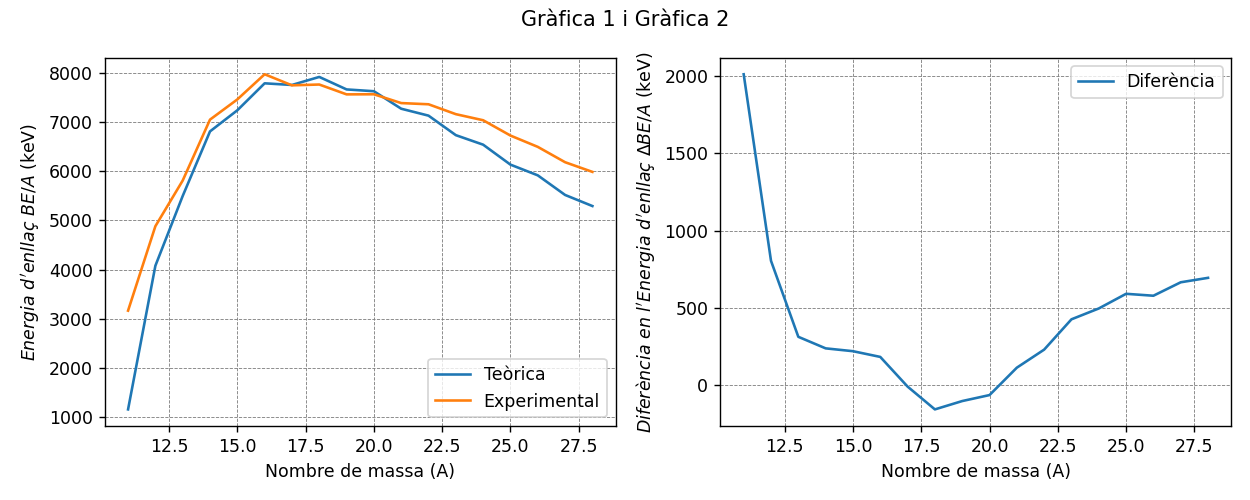

GridspecLayout(children=(interactive(children=(Text(value='O', description='Element:', placeholder="Nom de l'e…

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(10,4))
plt.suptitle('Gràfica 1 i Gràfica 2')
style = {'description_width': '200px'}
layout = widgets.Layout(width='300px') 

element = widgets.Text(
          value='O',
          placeholder='Nom de l\'element',
          description='Element:',
          disabled=False
          )

av = widgets.BoundedFloatText(value=16, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='Volum:', 
                              disabled=False,
                              style=style,
                              layout=layout)

aS = widgets.BoundedFloatText(value=18.3, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='Superficie:', 
                              disabled=True,
                              style=style,
                              layout=layout)

ac = widgets.BoundedFloatText(value=0.714, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='Coulomb:', 
                              disabled=True,
                              style=style,
                              layout=layout)

aA = widgets.BoundedFloatText(value=23, 
                              min=0, 
                              max=50, 
                              step=0.1, 
                              description='Asimetria:', 
                              disabled=False,
                              style=style,
                              layout=layout)

ap = widgets.BoundedFloatText(value=12, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='Emparellament:', 
                              disabled=True,
                              style=style,
                              layout=layout)

checkbox = widgets.Checkbox(
                            value=False,
                            description='Bloqueja / Desbloqueja Parametres',
                            disabled=False,
                            indent=False
                            )

link1 = widgets.link((aS, 'disabled'), (checkbox, 'value'))
link2 = widgets.link((ac, 'disabled'), (checkbox, 'value'))
link3 = widgets.link((ap, 'disabled'), (checkbox, 'value'))

grid = widgets.GridspecLayout(1, 2, height='auto')
grid[0, 0] = widgets.interactive(update_plot, element=element, av=av, aS=aS, ac=ac, aA=aA, ap=ap, checkbox=checkbox)

grid

En aquesta primera part de l’activitat, utilitzem dades d’energia d'enllaç els als isòtops d’oxigen per optimitzar els parametres del MGL, i per investigar l’efecte del terme d'emparellament en particular. Un cop acabada l'activitat, apunteu-vos els paràmetres optimitzats que heu trobat, ja que els necessitareu per a les activitats següents, així com per al qüestionari final.

* Les tasques es mostren a continuació en *cursiva*.  
* Les respostes a les preguntes amb una (<font color='red'>Q</font>) al costat es demanaran al qüestionari de l'activitat (el pots trobar a https://github.com/dpascuso/divulgacio_nuclear).

#### Activitat 1a

L’oxigen-16 $(A = 16)$ té 8 protons i 8 neutrons. Quan un isòtop té el mateix nombre de protons i neutrons, diem que és simètric en $Z$ i $N$. Això significa que el terme d’asimetria $(aA)$ no té cap efecte sobre l’energia d’enllaç. Les dades d’oxigen-16 es troben a la taula  anterior a la fila amb $N=8$.

Proveu de canviar la constant del terme d’asimetria $(aA)$ i convenceu-vos que l’energia d'enllaç (Teòrica) calculada per a l’oxigen-16 (la fila amb $N=8$) no depèn del terme d’asimetria. Tingueu en compte que el canvi de constant modificarà les energies d'enllaç de tots els altres isòtops.

#### Activitat 1b

(<font color='red'>Q</font>) Atès que el terme d’asimetria no afecta l’energia d’enllaç calculada per a l’oxigen-16, podeu posar-lo a zero per ara i utilitzar les dades experimentals de l’oxigen-16 per determinar el terme de volum $(aV)$.

Definiu $aA = 0$. Trobeu un bon valor per a la constant del terme de volum: modifiqueu la constant del terme de volum $(aV)$ fins que la diferència entre el model (Teòric) i les dades mesurades (Experimentals) de l’oxigen-16 (fila $N=8$) a la taula siguin molt a prop de zero. Un rang raonable per començar és d'entre $10$ i $20 MeV$. La vostra resposta final per a la constant del terme de volum $(aV)$ ha de tenir una precisió de com a mínim $0.1 MeV$.

#### Activitat 1c

(<font color='red'>Q</font>) Ara que ja sabeu quin és el terme de volum, podeu passar a determinar el terme d’asimetria $(aA)$ en funció de la forma de la corba d’energia d'enllaç a través de tots els isòtops d’oxigen que es mostren a les gràfiques.

Trobeu un bon valor per al terme de constant d’asimetria: podeu fer-ho variant la constant $(aA)$ fins que la forma de la corba d’energia d'enllaç teòrica coincideixi amb les dades experimentals de la ***Gràfica 1***. Això també hauria de minimitzar la diferència representada a la ***Gràfica 2*** (és a dir, a la ***Gràfica 2*** la línia hauria de ser propera a zero). Us suggerim que comenceu explorant què passa quan canvieu el paràmetre d’asimetria en passos de $10 MeV$ desde $-30 MeV$ fins a $30 MeV$. Tingueu en compte que no podreu obtenir un coincidència perfecta. Aquesta incertesa es pot utilitzar per obtenir una incertesa sobre el propi terme d'asimetria. La resposta final per al terme de asimetria constant $(aA)$ ha de tenir una precisió aproximada de $1 MeV$.

#### Activitat 1d

Ara que heu determinat tant el terme de volum $(aV)$ com el terme d’asimetria $(aA)$ del model de gota liquida, podem investigar l’efecte del terme d'aparellament.

Si manteniu el terme de volum $(aV)$ i el de asimetria $(aA)$ en els paràmetres optimitzats (les respostes que heu trobat als apartats 1b i 1c), poseu el terme d'emparellament a zero. A la ***Gràfica 2***, hi veureu un efecte sorprenent en funció de si hi ha un nombre senar o parell de neutrons a l’isòtop de l’oxigen amb masses de $13$ a $17$. Aquest és l’efecte del terme d’emparellament explicat al vídeo pel doctor Arnau Rios ( https://www.youtube.com/watch?v=Qsu7IrGiOIk). Quina és l’escala de les diferències que veieu a la  ***Gràfica 2*** (en $keV$)? Com es compara això amb l'energia d'enllaç total per nucleó (en $keV$) de la ***Gràfica 1***? [Nota: no cal que registreu les respostes a aquesta pregunta]

##### Ben fet en completar aquesta activitat. Ara torneu a la pàgina web (https://github.com/dpascuso/divulgacio_nuclear) per completar les preguntes del Qüestionari: Nuclis Líquids  i accedir a la següent activitat (Activitat 2 de Model de Gota Líquida, Prediccions del model).

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')